# Bigmart sales prediction

In this model we have to predict the sales of the items of big mart.

#### importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### reading train data and test data

In [2]:
train_data = pd.read_csv('Big Mart Sales.csv')
train_data1 = pd.read_csv('Big Mart Sales.csv') #i will this data to check factors affecting the output
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

#### checking null values

In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### treating null values

In [8]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
for i in train_data['Item_Type'].unique():
    li = list(train_data[(train_data['Item_Weight'].isnull()) & (train_data['Item_Type'] == i)].index)
    train_data['Item_Weight'][li] = train_data['Item_Weight'][train_data['Item_Type'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for i in test_data['Item_Type'].unique():
    li = list(test_data[(test_data['Item_Weight'].isnull()) & (test_data['Item_Type'] == i)].index)
    test_data['Item_Weight'][li] = test_data['Item_Weight'][test_data['Item_Type'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
train_data.drop('Outlet_Size', axis=1, inplace=True)

In [12]:
test_data.drop('Outlet_Size', axis=1, inplace=True)

#### label encoding

In [13]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in train_data.columns:
    if isinstance(train_data[i][0], str):
        train_data[i] = encoder.fit_transform(train_data[i])

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in test_data.columns:
    if isinstance(test_data[i][0], str):
        test_data[i] = encoder.fit_transform(test_data[i])

#### checking skewness in output


 mu = 2181.288913575032 and sigma = 1706.3995013565955



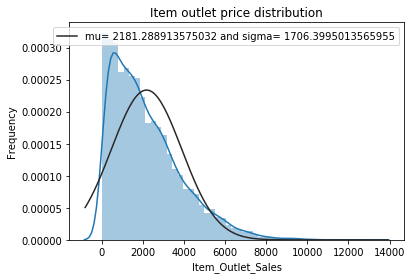

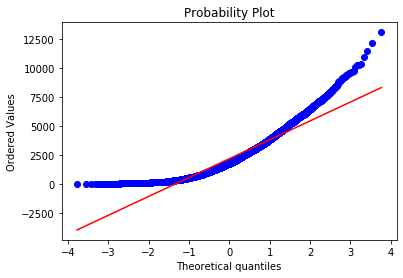

In [15]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train_data['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['Item_Outlet_Sales'])
print( f'\n mu = {mu} and sigma = {sigma}\n')

#Now plot the distribution
plt.legend([f'mu= {mu} and sigma= {sigma}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Item outlet price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['Item_Outlet_Sales'], plot=plt)
plt.show()

###### changing output column with log value


 mu = 7.2965402512610025 and sigma = 1.0170485783401055



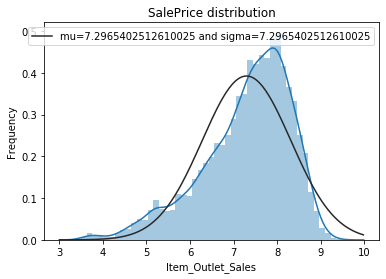

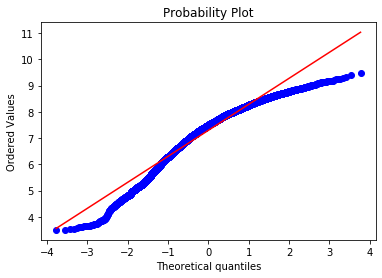

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data["Item_Outlet_Sales"] = np.log(train_data["Item_Outlet_Sales"])

#Check the new distribution 
sns.distplot(train_data['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['Item_Outlet_Sales'])
print( f'\n mu = {mu} and sigma = {sigma}\n')

#Now plot the distribution
plt.legend([f'mu={mu} and sigma={mu}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['Item_Outlet_Sales'], plot=plt)
plt.show()

#### checking for correlation in data

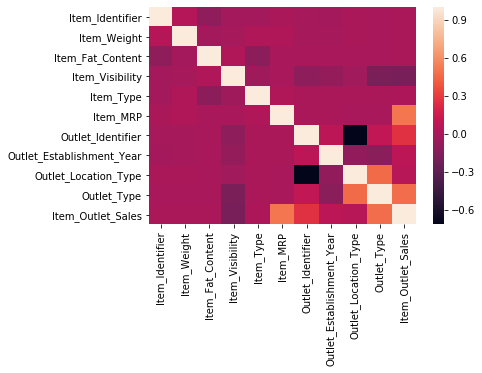

In [17]:
sns.heatmap(train_data.corr())

In [18]:
train_data.drop('Outlet_Location_Type',axis=1,inplace=True)
test_data.drop('Outlet_Location_Type',axis=1,inplace=True)

#### checking for outliers

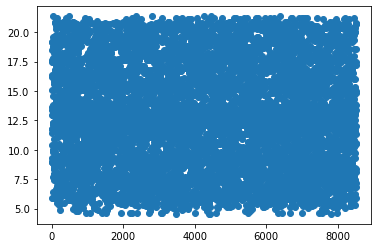

In [19]:
plt.scatter(train_data['Item_Weight'].index,train_data['Item_Weight'])

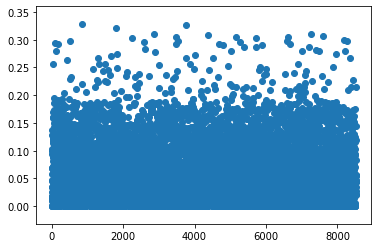

In [20]:
plt.scatter(train_data['Item_Visibility'].index,train_data['Item_Visibility'])

In [29]:
from scipy import stats
li = list(train_data['Item_Visibility'][np.abs(stats.zscore(train_data['Item_Visibility']))>4].index)
li

[83,
 108,
 174,
 521,
 854,
 1805,
 1841,
 2251,
 2586,
 2613,
 2855,
 2895,
 3474,
 3488,
 3540,
 3750,
 4006,
 4382,
 4674,
 4789,
 5031,
 5150,
 5287,
 5374,
 5732,
 5734,
 5880,
 6576,
 6622,
 6674,
 7005,
 7215,
 7250,
 7388,
 7499,
 7603,
 7949,
 8194,
 8215,
 8273]

In [30]:
train_data['Item_Visibility'][li] = train_data['Item_Visibility'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


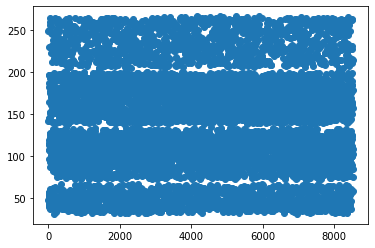

In [31]:
plt.scatter(train_data['Item_MRP'].index, train_data['Item_MRP'])

###### splitting data in X and y (input and output)

In [32]:
X = train_data.drop('Item_Outlet_Sales', axis = 1)
y = train_data['Item_Outlet_Sales']

#### checking correlation in input

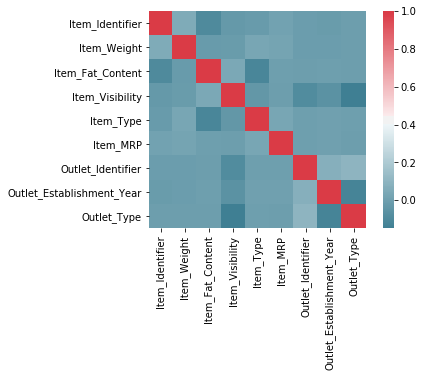

In [33]:
sns.heatmap(X.corr(), mask=np.zeros_like(X.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

#### checking vif

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])], index=X_vif.columns)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                        58769.179069
Item_Identifier                  1.014427
Item_Weight                      1.004935
Item_Fat_Content                 1.025363
Item_Visibility                  1.037278
Item_Type                        1.017784
Item_MRP                         1.001890
Outlet_Identifier                1.023578
Outlet_Establishment_Year        1.029551
Outlet_Type                      1.051510
dtype: float64

#### checking anova an correlation coefficient

In [35]:
column = X.columns
column = column.drop(['Item_Weight','Item_Visibility','Item_MRP'])

In [36]:
from scipy import stats
pd.Series([stats.f_oneway(X[i],y) for i in column], index = column)

Item_Identifier                                (25198.3824803495, 0.0)
Item_Fat_Content                             (206459.64194396828, 0.0)
Item_Type                    (2.2174040565749613, 0.13648084451126813)
Outlet_Identifier                             (6217.408876306685, 0.0)
Outlet_Establishment_Year                    (474826705.16086763, 0.0)
Outlet_Type                                  (189743.33649906804, 0.0)
dtype: object

In [37]:
colm = ['Item_Weight','Item_Visibility','Item_MRP']
pd.Series([np.abs(X[i].corr(y)) for i in colm], index = colm)

Item_Weight        0.007835
Item_Visibility    0.169557
Item_MRP           0.509671
dtype: float64

#### normalising the data

In [38]:
from sklearn.preprocessing import normalize
X = normalize(X)
test_data = normalize(test_data)

#### splitting the train data

In [39]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=.3, random_state =12)

## training data

#### using random forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,max_depth=5)

In [41]:
rfr.fit(train_X,train_y)
rfr.score(train_X,train_y)*100

74.28715167994002

In [42]:
rfr.score(test_X,test_y)*100

73.68495189146196

#### using xgboost

In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=80,max_depth=3)

In [44]:
xgb.fit(train_X,train_y)
xgb.score(train_X,train_y)*100

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:18:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


75.74980628469152

In [45]:
xgb.score(test_X,test_y)*100

74.12072071599663

###### xgboost giving better result so we use xgboost

In [46]:
xgb.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:18:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### making prediction on test data

In [47]:
xgb_results=xgb.predict(test_data)

In [48]:
xgb_results=np.exp(xgb_results)

In [49]:
xgb_results = pd.DataFrame(xgb_results, columns=['Item_Outlet_Sell'])

#### Final result

In [50]:
xgb_results

,Item_Outlet_Sell
0,1525.174316
1,1244.303589
2,536.542725
3,2258.766602
4,5721.335449
5,1693.657471
6,587.057373
7,2121.327148
8,1288.582153
9,2873.827148


###### checking for factors affecting the Item_Outlet_Sell

In [56]:
column = column.drop('Item_Identifier')

In [57]:
for i in column:
    print(train_data1.groupby(i).mean()['Item_Outlet_Sales'])

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64
Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64
Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192

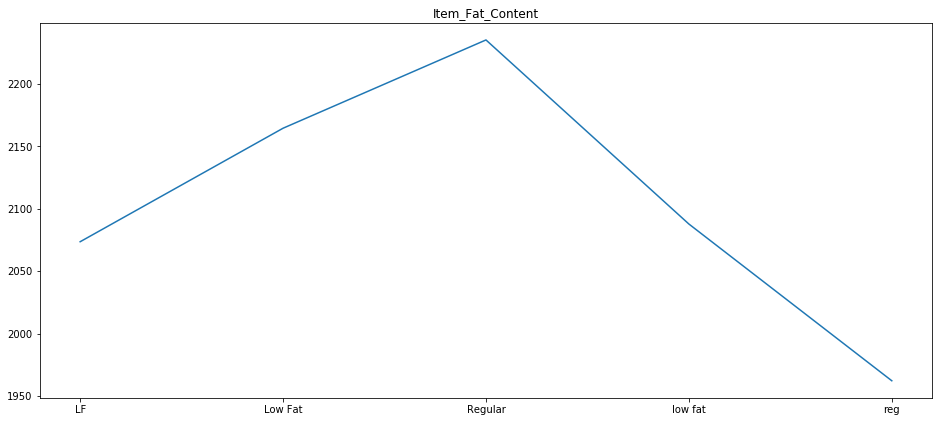

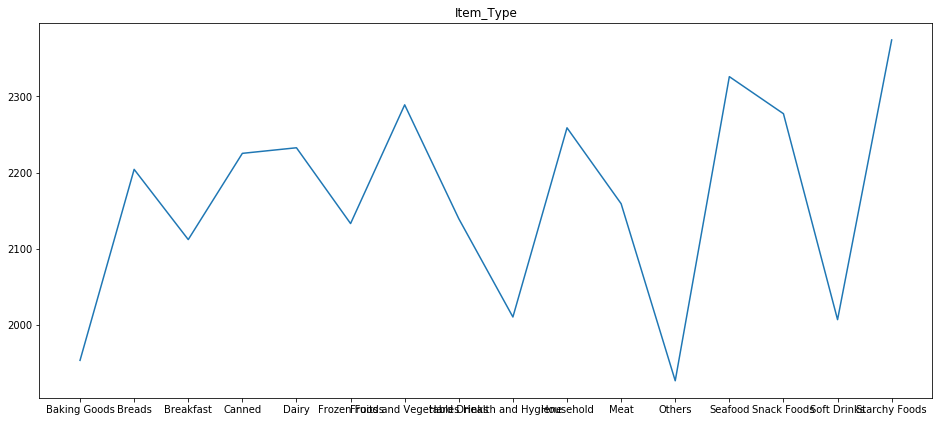

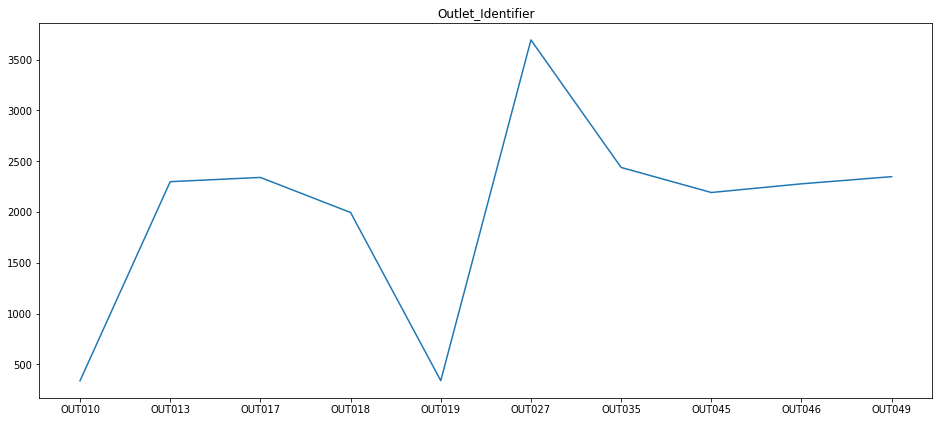

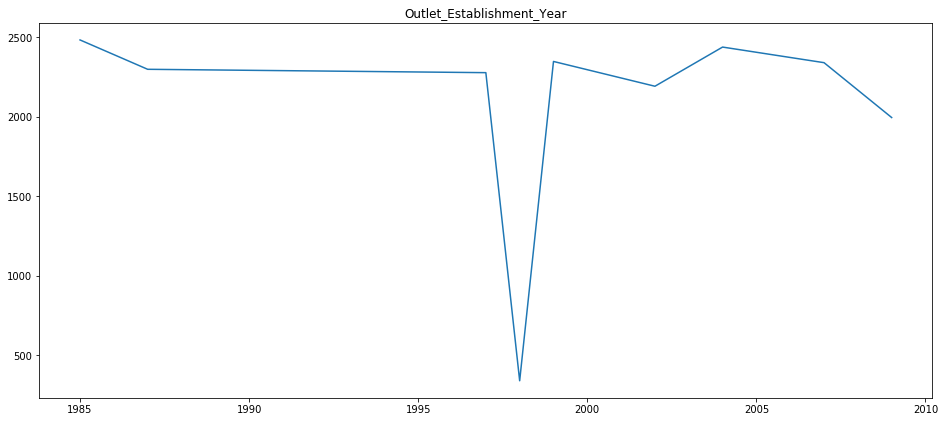

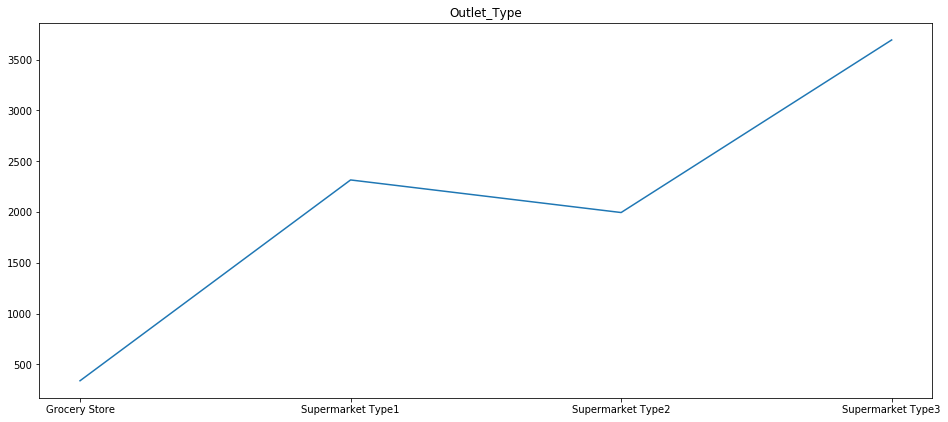

In [58]:
for i,j in zip(column,range(1,len(column)+1)):
    plt.figure(figsize=(16,40))
    plt.subplot(len(column),1,j)
    plt.plot(train_data1.groupby(i).mean()['Item_Outlet_Sales'].index,train_data1.groupby(i).mean()['Item_Outlet_Sales'])
    plt.title(i)